<p style="color:blue;">About this columns in the data</p>

<p style="color:green;">Variables Explained</p>

<p style="color:red;">
    <ul>
        <li><strong>Character:</strong> Categorical variable representing the name of the fictional character. <br> Values: Spider-Man, Iron Man, Captain America, Thor, Batman, Superman, Wonder Woman, Flash.</li>
        <li><strong>Universe:</strong> Categorical variable representing the universe or franchise from which the character originates. <br> Values: Marvel, DC Comics.</li>
        <li><strong>Strength:</strong> Numerical attribute representing the character's physical strength on a scale from 1 to 10.</li>
        <li><strong>Speed:</strong> Numerical attribute representing the character's speed or agility on a scale from 1 to 10.</li>
        <li><strong>Intelligence:</strong> Numerical attribute representing the character's intelligence or strategic thinking on a scale from 1 to 10.</li>
        <li><strong>Special Abilities:</strong> Categorical variable representing special powers or abilities possessed by the character. <br> Values: Flight, Invisibility, Super Strength, Telekinesis.</li>
        <li><strong>Weaknesses:</strong> Categorical variable representing vulnerabilities or weaknesses of the character. <br> Values: Kryptonite, Magic, Wooden Stake, Silver.</li>
        <li><strong>Battle Outcome (Target Variable):</strong> Binary variable indicating the outcome of the battle. <br> Values: 1 (Character 1 wins), 0 (Character 2 wins).</li>
    </ul>
</p>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats 

In [2]:
from sklearn.svm import SVC

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [4]:
from sklearn.metrics import accuracy_score

In [5]:
fictional_output = pd.read_csv('fictional_character_battles_complex.csv')
fictional_output.sample(5)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
649,Captain America,Marvel,1,8,7,Invisibility,Silver,0
1100,Batman,DC Comics,7,3,3,Super Strength,Silver,1
376,Spider-Man,DC Comics,4,5,1,Telekinesis,Kryptonite,0
1146,Captain America,Marvel,2,8,9,Flight,Silver,0
269,Wonder Woman,Marvel,5,3,9,Invisibility,Wooden Stake,1


In [6]:
fictional_output.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [7]:
fictional_output.shape

(2351, 8)

In [8]:
fictional_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2351 non-null   object
 1   Universe          2351 non-null   object
 2   Strength          2351 non-null   int64 
 3   Speed             2351 non-null   int64 
 4   Intelligence      2351 non-null   int64 
 5   SpecialAbilities  2351 non-null   object
 6   Weaknesses        2351 non-null   object
 7   BattleOutcome     2351 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 147.1+ KB


In [9]:
fictional_output.isnull().sum()

Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64

In [10]:
duplicates_count = fictional_output.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 6


In [11]:
fictional_output = fictional_output.drop_duplicates()

In [12]:
duplicates_count = fictional_output.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 0


In [13]:
shape_value = fictional_output.shape
print(f'shape of the data : {shape_value}')

shape of the data : (2345, 8)


In [14]:
fictional_output.describe()

,Strength,Speed,Intelligence,BattleOutcome
count,2345.000000,2345.000000,2345.000000,2345.000000
mean,5.441365,5.481450,5.550107,0.278038
std,2.896110,2.858841,2.861892,0.448128
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,0.000000
50%,5.000000,6.000000,6.000000,0.000000
75%,8.000000,8.000000,8.000000,1.000000
max,10.000000,10.000000,10.000000,1.000000


In [15]:
fictional_output.describe().corr()

,Strength,Speed,Intelligence,BattleOutcome
Strength,1.000000,1.000000,1.000000,0.999995
Speed,1.000000,1.000000,1.000000,0.999995
Intelligence,1.000000,1.000000,1.000000,0.999995
BattleOutcome,0.999995,0.999995,0.999995,1.000000


<br>
now applying the eda

In [16]:
fictional_output.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [17]:
fictional_output['Character'].value_counts()

Character
Wonder Woman       310
Superman           307
Iron Man           306
Thor               298
Flash              293
Batman             279
Spider-Man         276
Captain America    276
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\174784970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Character',data = fictional_output,palette='Set2',edgecolor="black",width=0.1)


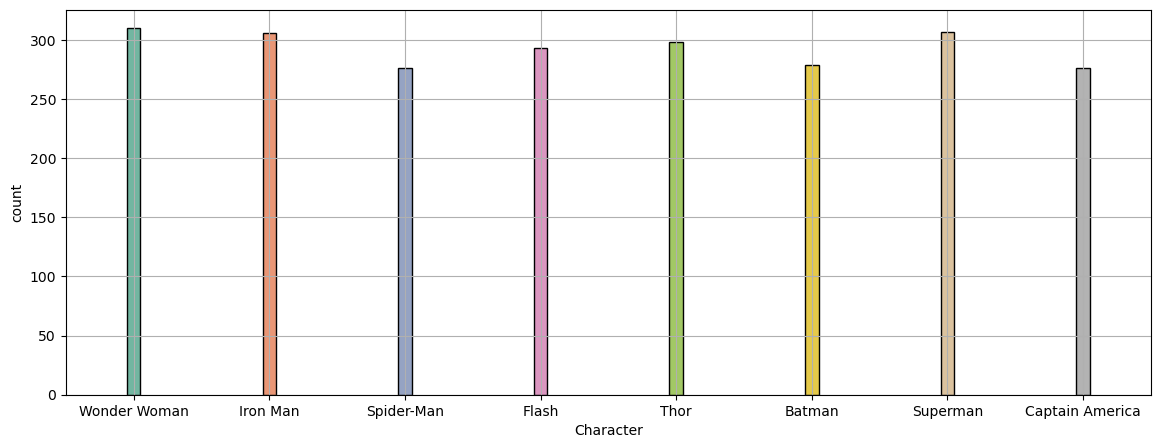

In [18]:
plt.figure(figsize = (14,5))
sns.countplot(x='Character',data = fictional_output,palette='Set2',edgecolor="black",width=0.1)
plt.grid(True)
plt.show()

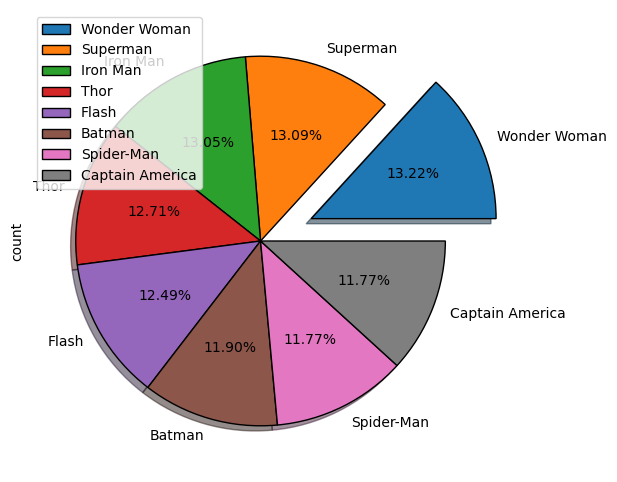

In [19]:
plt.figure(figsize =(10,6))

ex = [0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
fictional_output['Character'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',explode = ex,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend(loc='upper left')
plt.show()

In [20]:
fictional_output['Universe'].value_counts()

Universe
Marvel       1191
DC Comics    1154
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\748655228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Universe',data = fictional_output,palette='Set2',edgecolor="black",width=0.2)


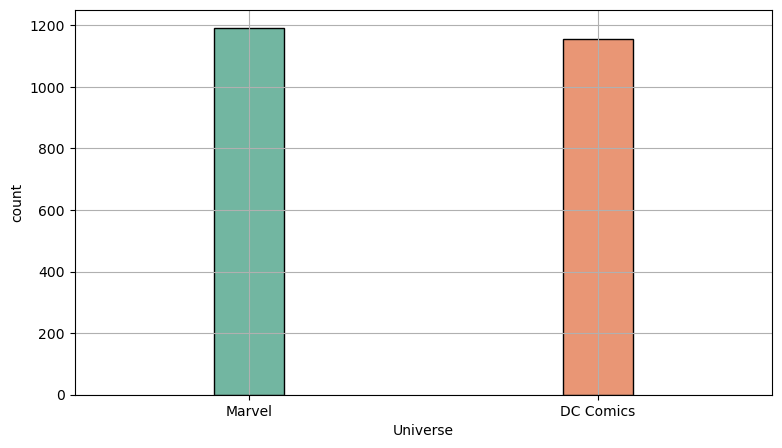

In [21]:
plt.figure(figsize = (9,5))
sns.countplot(x='Universe',data = fictional_output,palette='Set2',edgecolor="black",width=0.2)
plt.grid(True)
plt.show()

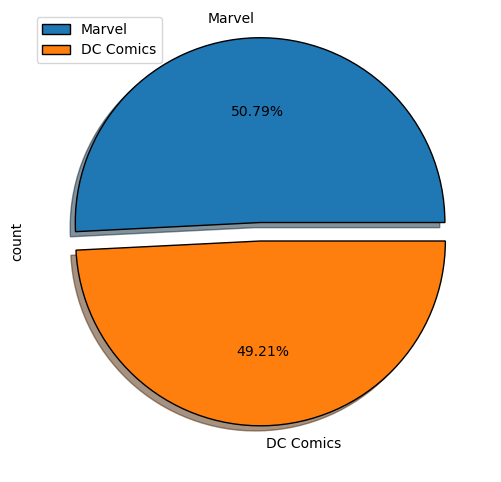

In [22]:
plt.figure(figsize =(10,6))

ex = [0.1,0.0]
fictional_output['Universe'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',explode = ex,shadow=True,wedgeprops={'edgecolor': 'black'})
plt.legend(loc='upper left')
plt.show()

In [23]:
fictional_output['SpecialAbilities'].value_counts()

SpecialAbilities
Invisibility      611
Flight            592
Telekinesis       572
Super Strength    570
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\3255637068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SpecialAbilities',data = fictional_output,palette='Set2',edgecolor="black",width=0.2)


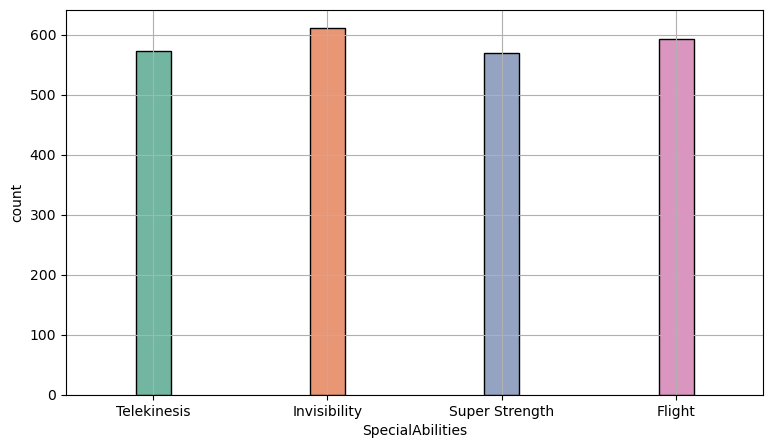

In [24]:
plt.figure(figsize = (9,5))
sns.countplot(x='SpecialAbilities',data = fictional_output,palette='Set2',edgecolor="black",width=0.2)
plt.grid(True)
plt.show()

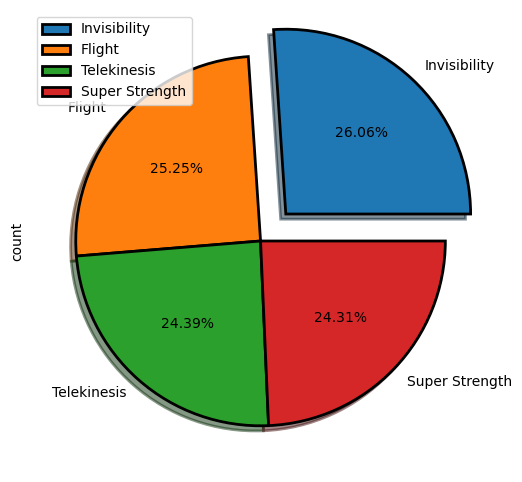

In [25]:
plt.figure(figsize =(10,6))

ex = [0.2,0.0,0.0,0.0]
fictional_output['SpecialAbilities'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',explode = ex,shadow=True,wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
plt.legend(loc='upper left')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\2204650501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weaknesses',data = fictional_output,palette='Set2',edgecolor="black",width=0.5,linewidth=2)


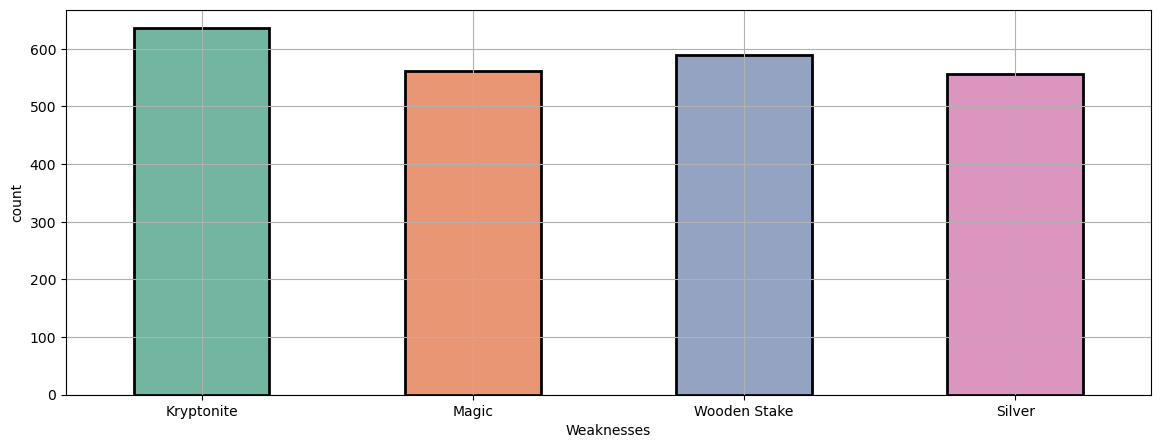

In [26]:
plt.figure(figsize = (14,5))
sns.countplot(x='Weaknesses',data = fictional_output,palette='Set2',edgecolor="black",width=0.5,linewidth=2)
plt.grid(True)
plt.show()

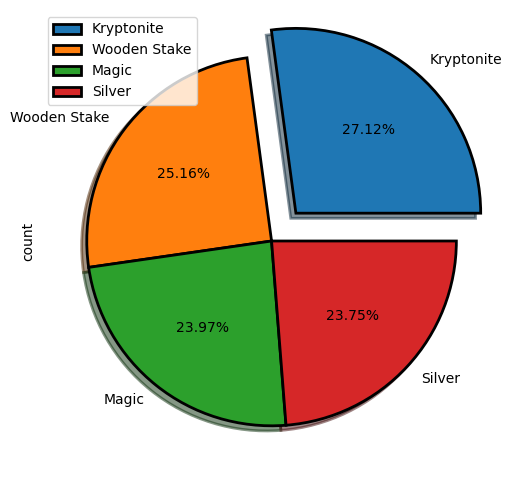

In [27]:
plt.figure(figsize =(10,6))

ex = [0.2,0.0,0.0,0.0]
fictional_output['Weaknesses'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',explode = ex,shadow=True,wedgeprops={'linewidth': 2, 'edgecolor': 'black'})
plt.legend(loc='upper left')
plt.show()

<Figure size 640x480 with 0 Axes>

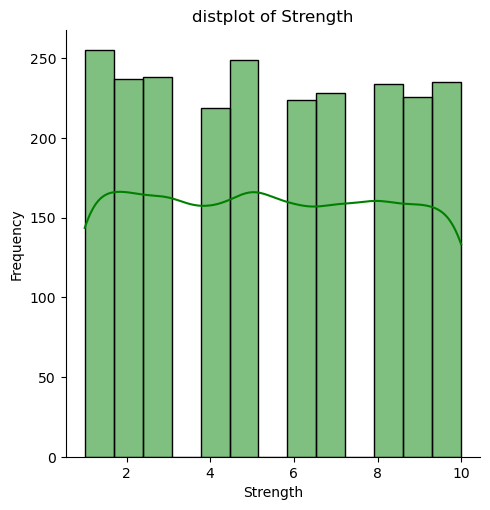

<Figure size 640x480 with 0 Axes>

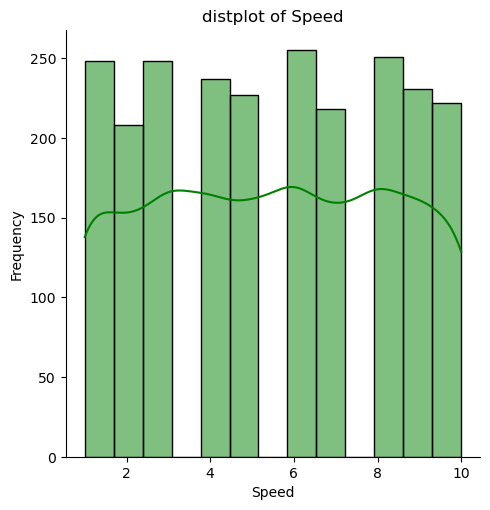

<Figure size 640x480 with 0 Axes>

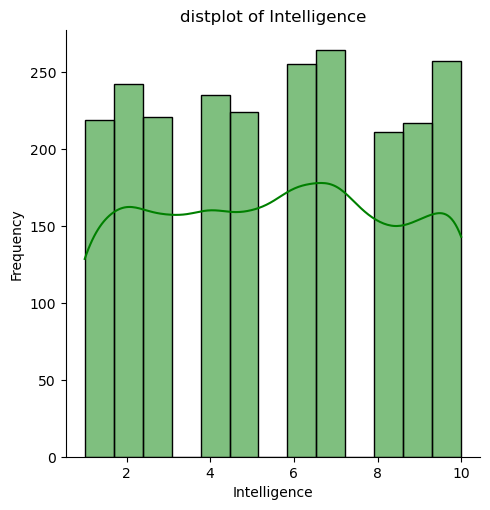

In [28]:
for column in fictional_output.columns:
     if column ==  'Strength':
        # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
        plt.figure()# Create a new figure for each plot
        sns .displot(fictional_output[column],color = "g",kde=True)  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'distplot of {column}')  # Set plot titl
        plt.show() 
     elif   column ==  'Speed':
         # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
         plt.figure()# Create a new figure for each plot
       
         sns .displot(fictional_output[column],color = "g",kde=True)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()
     elif   column ==  'Intelligence':
         plt.figure()# Create a new figure for each plot
       
         sns .displot(fictional_output[column],color = "g",kde=True)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()
     else:  continue 
    
  

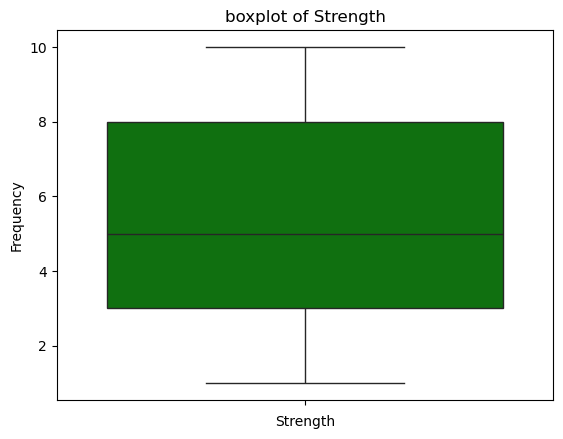

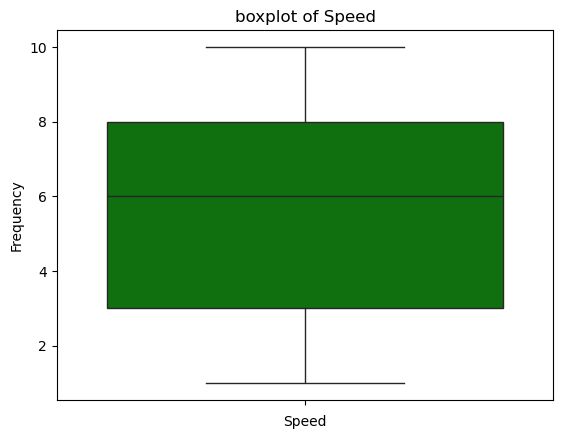

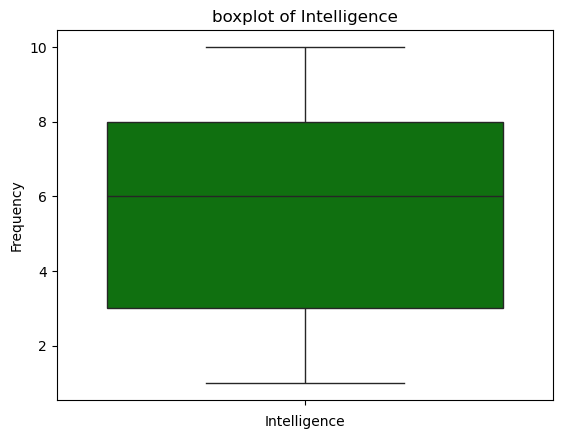

In [29]:
for column in fictional_output.columns:
     if column ==  'Strength':
       
        plt.figure()# Create a new figure for each plot
        sns .boxplot(fictional_output[column],color = "g")  
        plt.xlabel(column)  #
        plt.ylabel('Frequency')  
        plt.title(f'boxplot of {column}') 
        plt.show() 
     elif   column ==  'Speed':
         
         plt.figure()
       
         sns .boxplot(fictional_output[column],color = "g")  
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'boxplot of {column}')  # Set plot titl 
         plt.show()
     elif   column ==  'Intelligence':
         plt.figure()# Create a new figure for each plot
       
         sns .boxplot(fictional_output[column],color = "g")  
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'boxplot of {column}')  # Set plot titl 
         plt.show()
     
     else : continue

In [30]:
fictional_output.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


<br>
Bivarate 

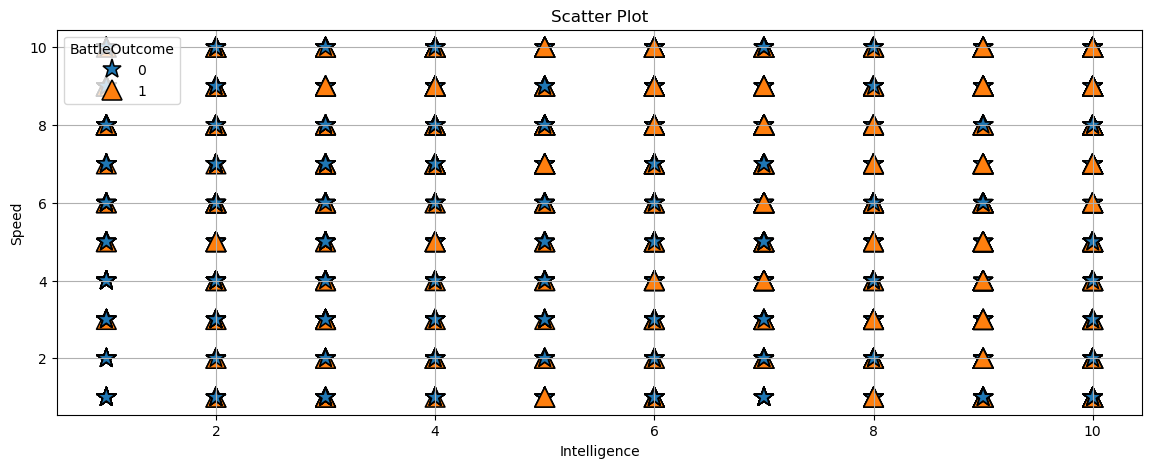

In [31]:
# Creating a scatter plotm 
plt.figure(figsize = (14,5))
m = {0:"*",1:"^"}
sns.scatterplot(x='Intelligence', y='Speed',data =fictional_output,color = 'r',hue = 'BattleOutcome',style = "BattleOutcome",markers = m,s=200,edgecolor='black')
plt.title('Scatter Plot')
plt.legend(title='BattleOutcome',loc='upper left')
plt.grid(True)

# Displaying the plot
plt.show()

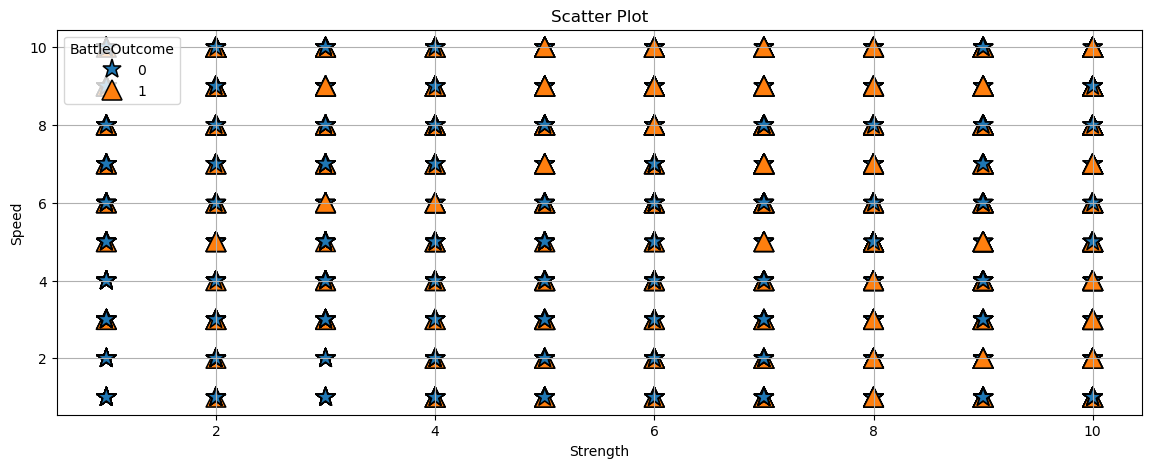

In [32]:
# Creating a scatter plotm 
plt.figure(figsize = (14,5))
m = {0:"*",1:"^"}
sns.scatterplot(x='Strength', y='Speed',data =fictional_output,color = 'r',hue = 'BattleOutcome',style = "BattleOutcome",markers = m,s=200,edgecolor='black')
plt.title('Scatter Plot')
plt.legend(title='BattleOutcome',loc='upper left')
plt.grid(True)

# Displaying the plot
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\2766373923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ="Character",y="Intelligence",data=fictional_output,palette='Set2',edgecolor="black",linewidth=2,width=0.2)


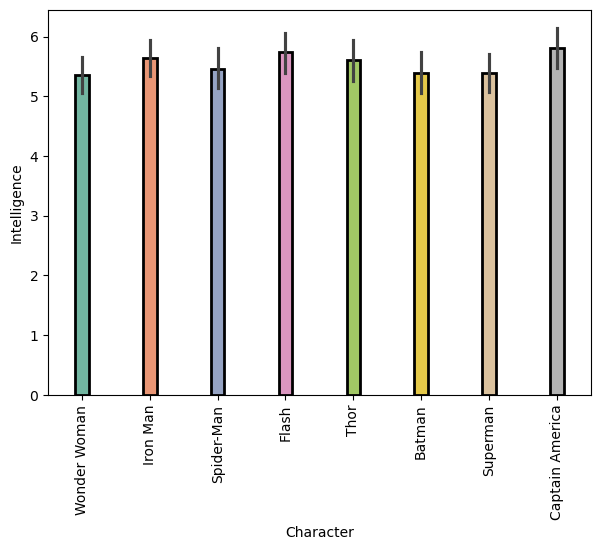

In [33]:
plt.figure(figsize = (7,5))
sns.barplot(x ="Character",y="Intelligence",data=fictional_output,palette='Set2',edgecolor="black",linewidth=2,width=0.2)
plt.xticks(rotation=90)
# plt.title("python",fontsize= 20) 
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\1258567697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ="Character",y="Speed",data=fictional_output,palette='Set2',edgecolor="black",linewidth=2,width=0.2)


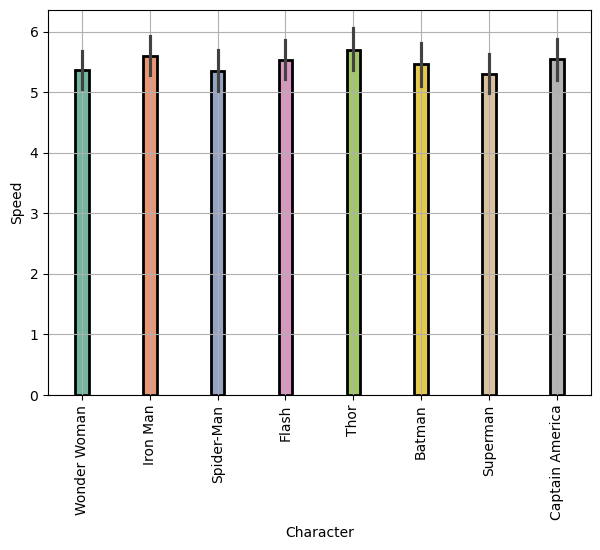

In [34]:
plt.figure(figsize = (7,5))
sns.barplot(x ="Character",y="Speed",data=fictional_output,palette='Set2',edgecolor="black",linewidth=2,width=0.2)
plt.xticks(rotation=90)
plt.grid(True)
# plt.title("python",fontsize= 20) 
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13544\2766373923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x ="Character",y="Intelligence",data=fictional_output,palette='Set2',edgecolor="black",linewidth=2,width=0.2)


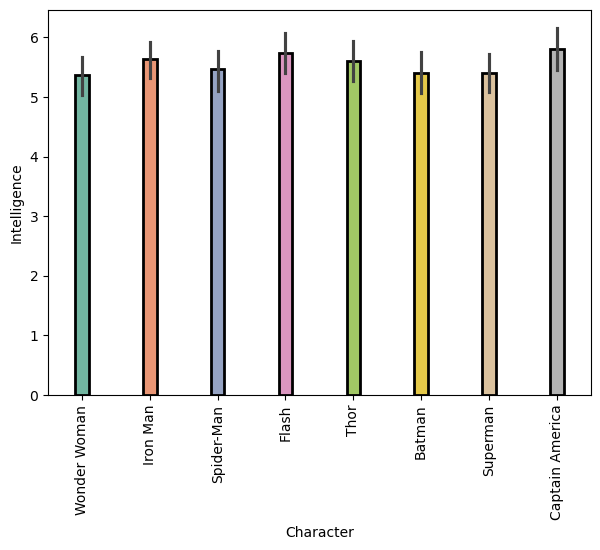

In [35]:
plt.figure(figsize = (7,5))
sns.barplot(x ="Character",y="Intelligence",data=fictional_output,palette='Set2',edgecolor="black",linewidth=2,width=0.2)
plt.xticks(rotation=90)
# plt.title("python",fontsize= 20) 
plt.show()

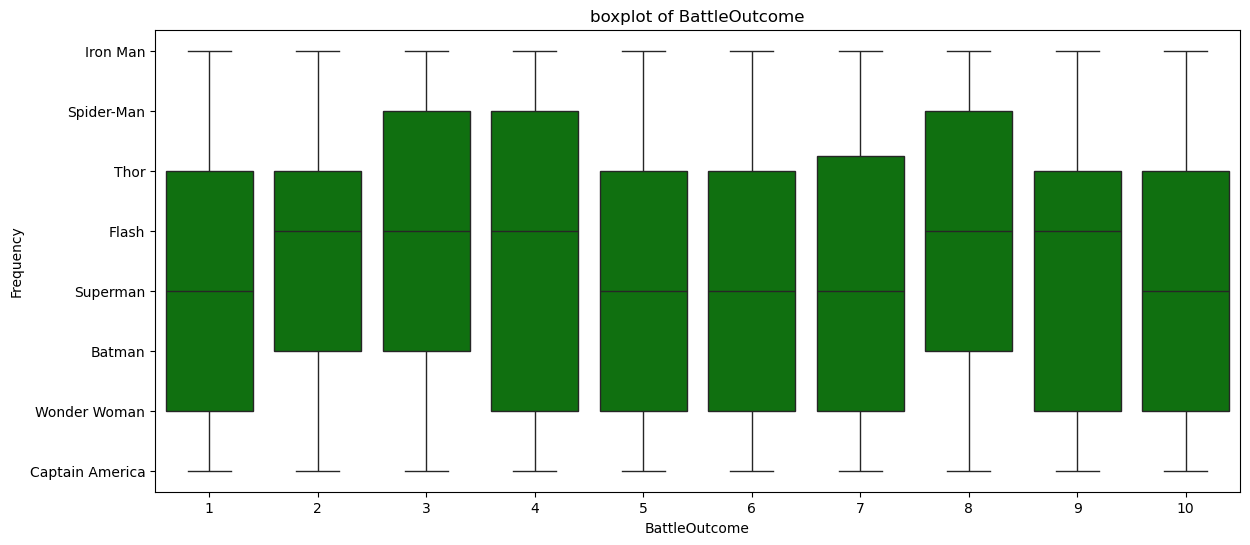

In [36]:
plt.figure(figsize = (14,6))       
sns .boxplot(x = 'Intelligence',y='Character',data =fictional_output,color = "g",orient='v')  
plt.xlabel(column)  # Set x-axis label as the column name
plt.ylabel('Frequency')  # Set y-axis label
plt.title(f'boxplot of {column}')  # Set plot titl 
plt.show()
     

In [37]:
correlation_matrix = fictional_output.describe().corr()
correlation_matrix

,Strength,Speed,Intelligence,BattleOutcome
Strength,1.000000,1.000000,1.000000,0.999995
Speed,1.000000,1.000000,1.000000,0.999995
Intelligence,1.000000,1.000000,1.000000,0.999995
BattleOutcome,0.999995,0.999995,0.999995,1.000000


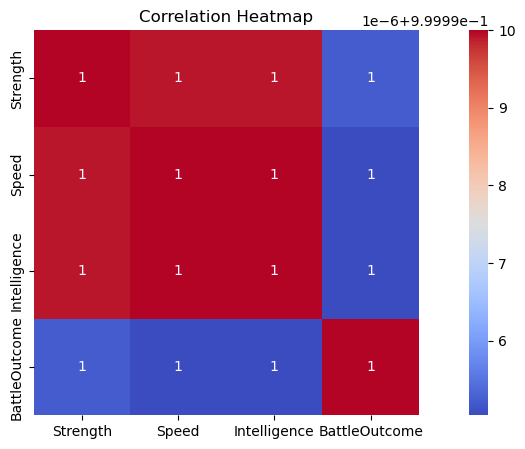

In [38]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

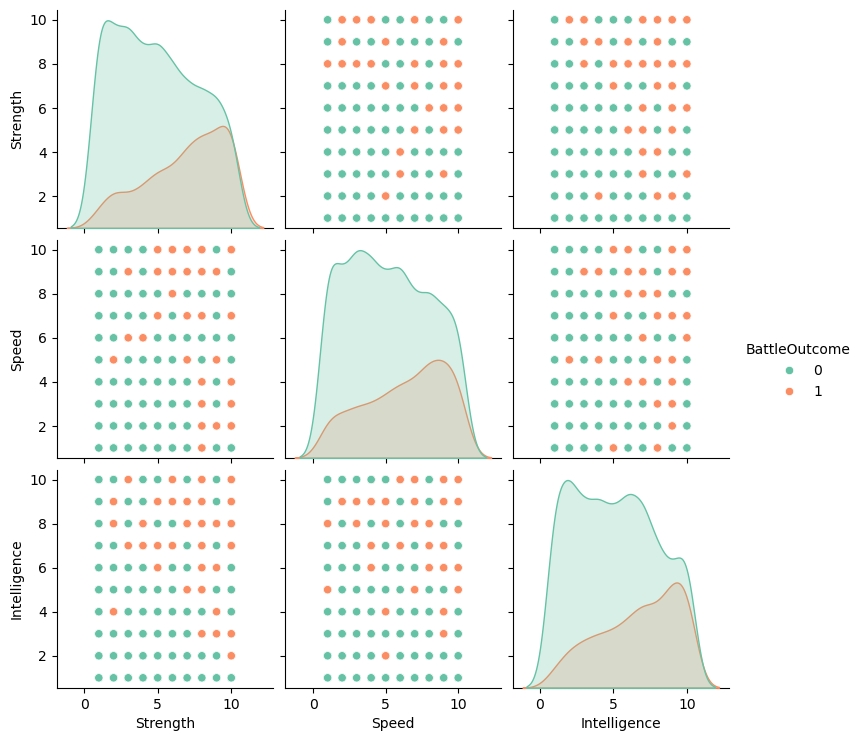

In [39]:
# fist we applying the pair polt
sns.pairplot(fictional_output,hue = 'BattleOutcome',palette='Set2')
plt.show()

In [40]:
fictional_output.head(3)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0


<br>
making the model

In [41]:
x = fictional_output.drop('BattleOutcome',axis = 1)
y = fictional_output['BattleOutcome']

In [42]:
x.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite
4,Flash,Marvel,7,6,2,Invisibility,Magic


In [43]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2346    0
2347    1
2348    0
2349    1
2350    1
Name: BattleOutcome, Length: 2345, dtype: int64

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [51]:
x_train.head(2)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses
1879,Thor,DC Comics,6,8,9,Invisibility,Silver
1837,Thor,Marvel,5,8,2,Flight,Magic


In [52]:
x_train.shape

(1876, 7)

In [53]:
x_test.head(2)

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses
1394,Thor,Marvel,9,2,3,Telekinesis,Kryptonite
670,Iron Man,Marvel,3,6,6,Super Strength,Wooden Stake


In [54]:
x_test.shape

(469, 7)

In [55]:
y_train

1879    1
1837    0
566     1
298     1
933     0
       ..
1641    0
1097    0
1132    1
1297    1
862     1
Name: BattleOutcome, Length: 1876, dtype: int64

In [56]:
y_test

1394    0
670     0
2000    1
810     0
1901    0
       ..
735     0
325     0
2242    0
375     0
836     0
Name: BattleOutcome, Length: 469, dtype: int64

In [57]:
# Define the preprocessing steps for numerical and categorical columns
categorical_features = ['Character', 'Universe', 'SpecialAbilities','Weaknesses']

In [59]:
    categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        
        ('cat', categorical_transformer, categorical_features)
    ])

In [61]:
# Create the final pipeline including the preprocessor and a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm',SVC())
])

In [62]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Character', 'Universe',
                                                   'SpecialAbilities',
                                                   'Weaknesses'])])),
                ('svm', SVC())])

In [63]:
pipeline.fit(x_train, y_train)

# Make predictions
y_pred = pipeline.predict(x_test)

In [67]:
accuracy_score(y_test,y_pred)

0.7100213219616205